# <h1><center> HW 8 AMATH 342 </center></h1>

Working together is encouraged.  Please do not refer to prior years' solutions.

Turn in a write up with your solutions including discussion, plots, and code. Full points require that this is legible, understandably explained, and reasonably organized. 

If you have difficulty with the assignment, please $\textbf{come to office hours and get help!}$ 

<p> <b> Avinash Joshi </b> </p>
<p> <b> AMATH 342 Wi 22 </b> </p>
<p> <b> Prof. Shea-Brown </b> </p>
<p> <b> 7 March 2022 </b> </p>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

$\textbf{Problem 1: Building a Neural Net}$

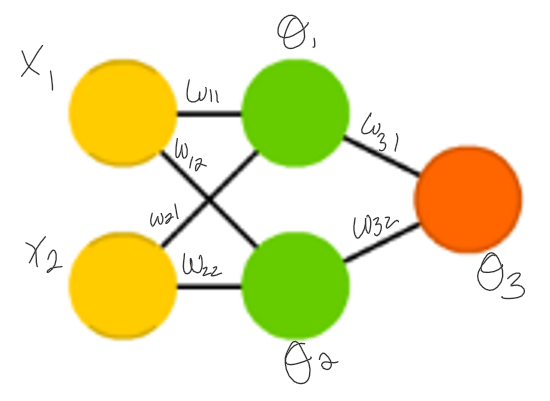

Create a two layer neural network which can solve the XOR problem. To receive full credit, you need do the following
* Write down the weights, theta's and the g's for each of your 3 perceptrons. (A total of 9 numbers and 3 functions, although it would be easiest to just reuse the same g)
* Just for the four points (0,0), (1,0), (1, 1), (0,1), show the computations that show that your network really outputs [0, 1, 0, 1] for the four data points. That is, write the exact computations to show how the initial x1 and x2's get transformed to a binary label.

<br>

In [94]:
theta1 = 1
theta2 = 1
theta3 = 1
w11 = 2
w12 = -2
w31 = 2
w22 = 2
w21 = -2
w32 = 2

x1 = np.array([0,1,1,0])
x2 = np.array([0,0,1,1])
y = np.array([0,1,0,1])

h1 = np.heaviside((x1*w11 + x2*w21 - theta1), 1)
h2 = np.heaviside((x2*w22 + x1*w12 - theta2), 1)
yhat = np.heaviside((h1*w31 + h2*w32 - theta3), 1)
print('yhat:', yhat, 'y:', y)

yhat: [0. 1. 0. 1.] y: [0 1 0 1]


$\textbf{Problem 2: Training a Perceptron}$ 

Train a perceptron using $\textit{the perceptron training rule}$ to classify the following data. 

The data measure septal length (column 1) and petal length (column 2) of two types of flowers. These data are stored in the variable '$\textbf{X}$'. Your model should take $\textit{septal length}$ and $\textit{petal length}$ as inputs. Your model should output 1 if the flower is a setosa or -1 if
it is a versicolor (two types of Iris flower). These data are in $\textbf{y}$. Both have been loaded in the cell below for you. There are 50 samples of each flower (so $\textbf{X}$ is 100 $\times$ 2). Here are some steps to help guide you.


A) Plot the data. Color code the data so that the  setosa flowers are one color and versicolor flowers are a different color. Can a perceptron be used for these data? Why? 

B) Write a loop which implements the perceptron learning rule. <br>
$\hspace{4mm}$    a) Initialize your weights and bias to random values (say -1 $\leq$ w $\leq$ 1). <br>
$\hspace{4mm}$    b) Iterate through all the data points in $\textbf{X}$ and update the weights and bias for EACH data point. 

C) What is the number of misclassifications (or error rate) of your perceptron after 10 steps? 30? 

D) Sometimes, we will train over many "epochs." That is, we loop over all the data several times and just continue using gradient descent. What is the error rate after training over two epochs? 

E) How does this error rate change as a function of learning rate? Plot the error as a function of the learning rate for 3-5 different learning rates (hint: try logspace to choose learning rates between 0 and 1). Train over at least one epoch on the data. 



<br><br><br><br>
HINTS: <br><br>
-Use a learning rate between 0 and 1. <br> <br>
-For your perceptron, you can use the following for updating on each step (this is similar to the learning rule we saw in class):

$\Delta w = \eta(t_{i}-o_{i}) * x_{i}$ for the weights and <br>
$\Delta \theta = \eta(t_i-o_i)$ for the bias, where $o_{i}$ is your output, $t_{i}$ is your target output, $\eta$ is your learning rate, and $x_{i}$ is your input. <br><br><br>
-Remember to update both weights: $w_1$ and $w_2$ in your loop.  

## 2A

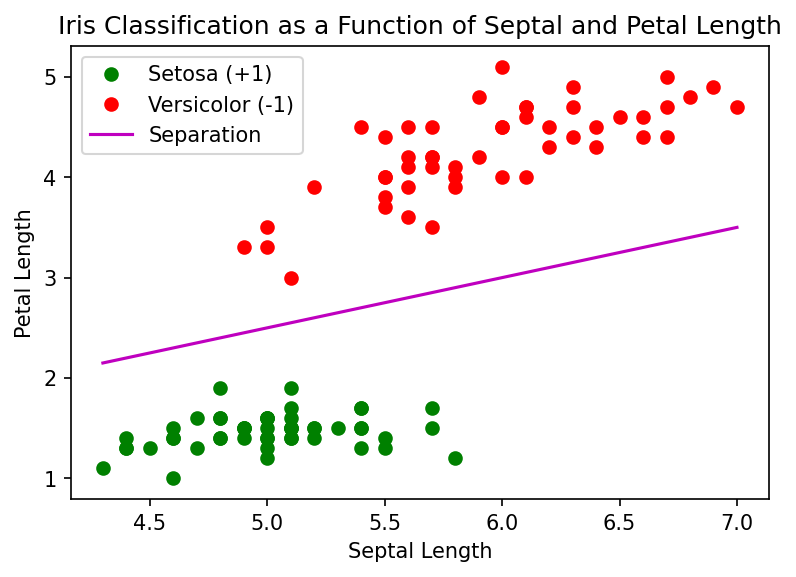

In [98]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

t = np.linspace(np.min(X[:,0]),np.max(X[:,0]),1000)
line = (t)/2

plt.plot(X[0:50,0],X[0:50,1], 'go',label = 'Setosa (+1)')
plt.plot(X[50:,0],X[50:,1], 'ro',label = 'Versicolor (-1)')
plt.plot(t, line, 'm', label = 'Separation')
plt.xlabel('Septal Length')
plt.ylabel('Petal Length')
plt.title('Iris Classification as a Function of Septal and Petal Length')
plt.legend()
plt.show()

A Perceptron can be used to define whether an iris is setosa or versicolor by septal and petal length because the two classes are lineraly seperable. This means that a line, like the magenta one, can seperate the two classes. Since the Perceptron only relies upon linear operations, only linearly separable problems can be solved by the Perceptron.

In [82]:
def Perceptron(inputs, weights, bias):
    pred = np.sign(np.dot(inputs, weights) - bias)
    return pred, weights, bias

def MSE(true, pred):
    val = 0
    val = (np.linalg.norm(true - pred, 2)**2)/len(true)
    return val

## 2C

In [99]:
#Implementing the perceptron learning rule 
np.random.seed(5)  
wts = np.random.randn(2,1)
bias= np.random.randn(1,1)

lr = 0.01

steps = 10
yhat = np.zeros((steps))
truey = np.zeros((steps))
for i in range(steps):
    inp = X[i,:]
    truey[i] = y[i]
    
    pred, wts, bias = Perceptron(inp, wts, bias)
    
    wts += (lr*(truey[i] - pred)*inp).T
    bias += lr*(truey[i] - pred)
    yhat[i] = pred
    
MSEten = MSE(truey, yhat)

In [100]:
print(truey, yhat)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [-1. -1.  1.  1.  1.  1.  1.  1. -1.  1.]


In [101]:
np.random.seed(5)  
wts = np.random.randn(2,1)
bias= np.random.randn(1,1)

lr = 0.01

steps = 30
yhat = np.zeros((steps))
truey = np.zeros((steps))
for i in range(steps):
    inp = X[i,:]
    truey[i] = y[i]
    
    pred, wts, bias = Perceptron(inp, wts, bias)
    
    wts += (lr*(truey[i] - pred)*inp).T
    bias += lr*(truey[i] - pred)
    yhat[i] = pred
    
MSEthirty = MSE(truey, yhat)

In [102]:
print(truey, yhat)
print(MSEten, MSEthirty)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.] [-1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.1999999999999997 0.39999999999999997


The MSE after ten iris samples is $1.2$ which is alright. The MSE after thrity iris samples is $0.4$ which is $\frac{1}{3}$ of the ten iris sample MSE. Unsurprisingly, the first few are completely wrong because the Perceptron is warming up to the correct prediction. This data, however, is very skewed  as the first 50 instances correspond to the setosa iris. A better Perceptron would be to have the iris classes randomly mixed.

## 2D

In [106]:
np.random.seed(5)  
wts = np.random.randn(2,1)
bias= np.random.randn(1,1)

lr = 0.01

epochs = 2
steps = X.shape[0]

yhat = np.zeros((steps))
truey = np.zeros((steps))

for jj in range(epochs):
    for i in range(steps):
        inp = X[i,:]
        truey[i] = y[i]
    
        pred, wts, bias = Perceptron(inp, wts, bias)
    
        wts += (lr*(truey[i] - pred)*inp).T
        bias += lr*(truey[i] - pred)
        yhat[i] = pred
        
MSEtwoepoch = MSE(truey, yhat)

In [108]:
print(truey, yhat)
print(MSEtwoepoch)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.] [ 1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
0.08000000000000002


After two epochs with a low learning rate of $0.01$, the MSE was $0.08$ which is considerably lower than the ten sample and thrity sample MSE. This means that the Perceptron has almost completely predicted the separation in the two iris types.

## 2E

In [88]:
np.random.seed(5)  
wts = np.random.randn(2,1)
bias= np.random.randn(1,1)

lrlist = np.arange(0.01, 1, 0.01)
MSElr = np.zeros((len(lrlist)))

for kk in range(len(lrlist)):
    lr = lrlist[kk]
    
    epochs = 1
    steps = X.shape[0]

    yhat = np.zeros((steps))
    truey = np.zeros((steps))

    for jj in range(epochs):
        for i in range(steps):
            inp = X[i,:]
            truey[i] = y[i]
    
            pred, wts, bias = Perceptron(inp, wts, bias)
    
            wts += (lr*(truey[i] - pred)*inp).T
            bias += lr*(truey[i] - pred)
            yhat[i] = pred
    MSElr[kk] = MSE(truey, yhat)

In [109]:
print(MSElr)

[0.16 0.08 0.08 0.08 0.12 0.08 0.12 0.08 0.12 0.04 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


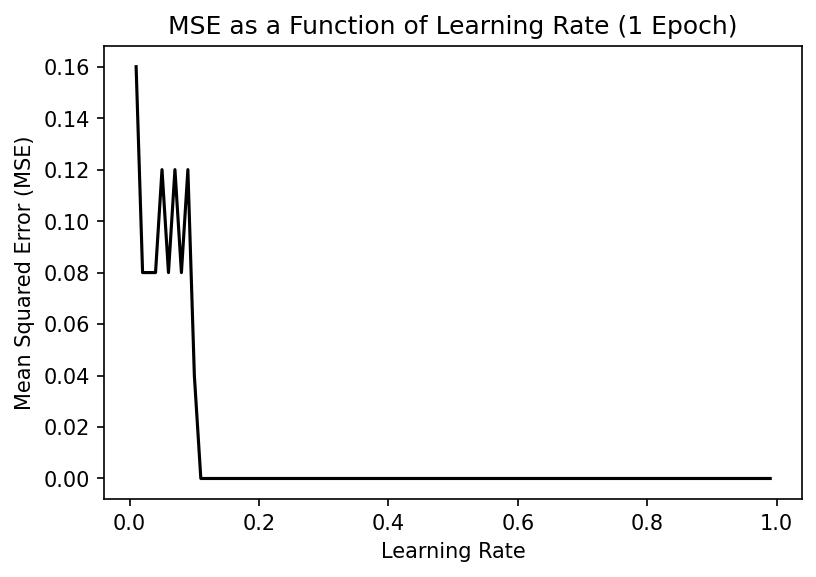

In [91]:
plt.plot(lrlist, MSElr, 'k-', ms = 4)
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE as a Function of Learning Rate (1 Epoch)')
plt.show()

Training over 1 epoch and increasing the learning rate by $0.01$ betweene each trial, the MSE initially decreased but then oscillated between $0.12$ and $0.08$. After a learning rate of about $0.1$, the MSE plummeted to zero at a learning rate of $0.11$. This suggests that after a learning rate $0.1$, the differentiation between setosa and versicolor was quickly mastered. The effect of learning rate should be exlored using a mixed data set instead of a separated one, like the one that is provided. This will be more applicable to other non-trivial examples.

$\textbf{Problem 3:  Preparing to analyze real neural big data from the Allen Brain Observatory.}$


* On the machine you will be using in class next week, at the terminal (or command line), type pip install allensdk (this will install the software tools on the local machine)
* Download Set_up.ipynb from the Allen Brain Observatory folder of our dropbox
* Run the cells of this code
* Include the output of last two code cells here, showing us all that this process ran successfully!  

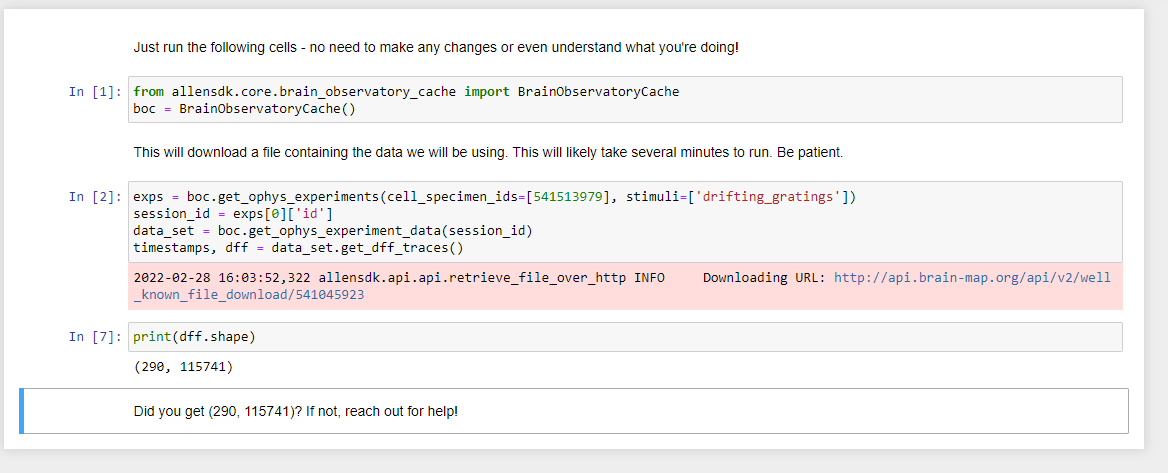